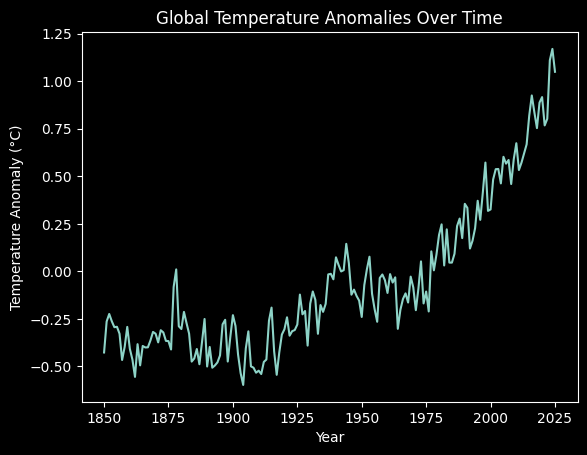

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv("d:/vcode/febdatasetchallange/HadCRUT.5.1.0.0.analysis.summary_series.global.annual.csv")

df.head()
plt.plot(df["Time"], df["Anomaly (deg C)"])
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Global Temperature Anomalies Over Time")
plt.grid(True)

plt.show()